# 데이터 전처리

In [77]:
import numpy as np
import pandas as pd

In [78]:
df = pd.read_csv("https://raw.githubusercontent.com/songys/Chatbot_data/master/ChatbotData.csv")
df.head()

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0


In [79]:
df_need = df[df.label != 0] # label이 0인 값 제거

In [80]:
df_shuffled = df_need.sample(frac=1).reset_index(drop=True)

In [87]:
df_shuffled.head()

,Q,label
0,짝남이 내 친구 좋아하는 현실 어떻게 받아들여요?,2
1,우리모두 마음의여유를 가져봐,1
2,잠들기 직전 일어난 직후는 죽을 것 같네,1
3,하루하루 이별하는 기분,1
4,요즘 눈에 띄는 남자애가 있는데,2


In [86]:
df_shuffled = df_shuffled.loc[:, ['Q', 'label']]

In [99]:
train_data = list(df_shuffled.Q)[:4000]
test_data = list(df_shuffled.Q)[4000:5000]
train_label = list(df_shuffled.label)[:4000]
test_label = list(df_shuffled.label)[4000:5000]

In [89]:
from transformers import BertTokenizer

In [90]:
# 토크나이저 불러오기
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', do_lower_case=False)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

In [92]:
# pad_sequences? Sequences로 이루어진 리스트를 Numpy 2d 배열로 바꿔주는 함수
from keras.utils import pad_sequences

In [93]:
def tokenize_list(data):
    sentences = ["[CLS] " + str(s) + " [SEP]" for s in data]
    tokenized_texts = [tokenizer.tokenize(s) for s in sentences]

    print("토크나이징 전: ", sentences[0])
    print("토크나이징 후: ", tokenized_texts[0])

    input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]

    return input_ids

def transform_list(input_ids):
    input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
    return input_ids

In [102]:
MAX_LEN = 60
input_ids = tokenize_list(train_data)
input_ids = transform_list(input_ids)
test_input_ids = tokenize_list(test_data)
test_input_ids = transform_list(test_input_ids)
print(len(input_ids), len(test_input_ids))

토크나이징 전:  [CLS] 짝남이 내 친구 좋아하는 현실 어떻게 받아들여요? [SEP]
토크나이징 후:  ['[CLS]', '짝', '##남', '##이', '내', '친', '##구', '좋', '##아', '##하는', '현', '##실', '어', '##떻', '##게', '받아', '##들', '##여', '##요', '?', '[SEP]']
토크나이징 전:  [CLS] 헤어진 지 2주가 지났네. [SEP]
토크나이징 후:  ['[CLS]', '헤', '##어진', '지', '2', '##주', '##가', '지', '##났', '##네', '.', '[SEP]']
4000 1000


In [103]:
# 최대값 구하기(최대 시퀀스 길이 설정할 때 참고용)
temp = 0
for _, sentence in enumerate(input_ids):
    temp = max(temp, len(sentence))

print(temp)

60


마스크 생성

In [104]:
# attention mask : padding된 값(즉, 0)을 구별할 수 있도록 생성
attention_masks = []
print(len(input_ids), len(test_input_ids))
for seq in input_ids:
    seq_mask = [float(i>0) for i in seq]
    attention_masks.append(seq_mask)

4000 1000


In [152]:
# attention mask : padding된 값(즉, 0)을 구별할 수 있도록 생성
test_attention_masks = []
for seq in test_input_ids:
    seq_mask = [float(i>0) for i in seq]
    test_attention_masks.append(seq_mask)

In [106]:
len(attention_masks)

4000

# 필요한 라이브러리 설치

In [2]:
!pip install -q opencv-python

In [4]:
!pip install -q tf-models-official

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.3/106.3 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 24.4 MB/s eta 0:00:00


In [5]:
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [6]:
import os

import numpy as np
import matplotlib.pyplot as plt

import tensorflow_models as tfm
import tensorflow_hub as hub
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [7]:
gs_folder_bert = "gs://cloud-tpu-checkpoints/bert/v3/uncased_L-12_H-768_A-12"
tf.io.gfile.listdir(gs_folder_bert)

['bert_config.json',
 'bert_model.ckpt.data-00000-of-00001',
 'bert_model.ckpt.index',
 'vocab.txt']

In [8]:
head= '/content/'

In [9]:
train_x = np.load(head+'train_x.npy') # 파일 불러와서 확인
test_x = np.load(head+'test_x.npy') # 파일 불러와서 확인

In [10]:
train_y = np.load(head+'train_y.npy') # 파일 불러와서 확인
test_y = np.load(head+'test_y.npy') # 파일 불러와서 확인

In [11]:
train_size, test_size = 4000, 1000

In [12]:
X_train = train_x[:train_size]
Y_train = train_y[:train_size]
X_test = test_x[:test_size]
Y_test = test_y[:test_size]

In [13]:
Y_train = Y_train - 1
Y_test = Y_test - 1

In [14]:
Y_train[:10]

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0])

In [44]:
import json

bert_config_file = os.path.join(gs_folder_bert, "bert_config.json")
#config_dict = json.loads(tf.io.gfile.GFile(bert_config_file).read())
#config_dict

In [45]:
encoder_config = tfm.nlp.encoders.EncoderConfig({
    'type':'bert',
})

In [46]:
bert_encoder = tfm.nlp.encoders.build_encoder(encoder_config)
bert_encoder

In [55]:
bert_classifier = tfm.nlp.models.BertClassifier(network=bert_encoder, num_classes=2)

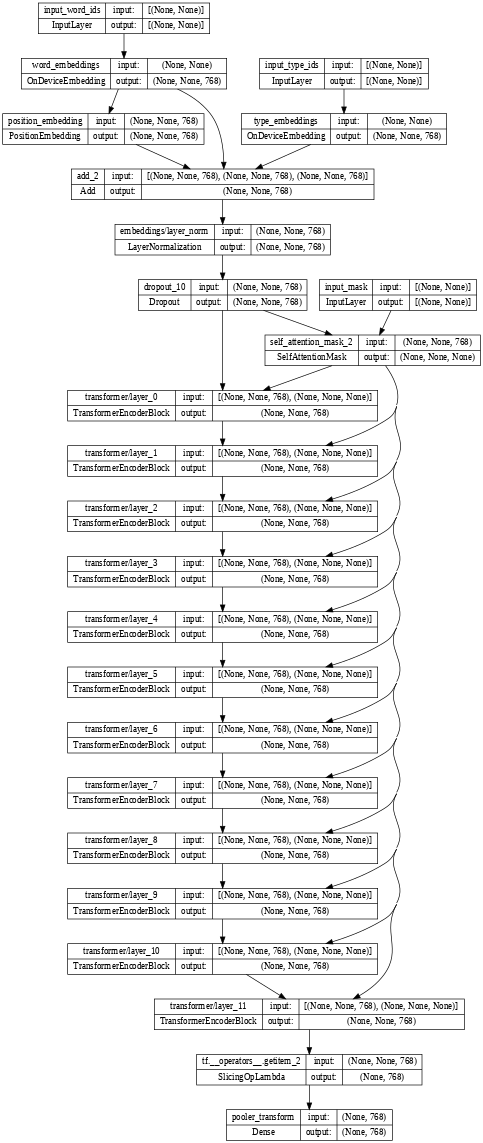

In [56]:
tf.keras.utils.plot_model(bert_encoder, show_shapes=True, dpi=48)

In [57]:
checkpoint = tf.train.Checkpoint(encoder=bert_encoder)
checkpoint.read(
    os.path.join(gs_folder_bert, 'bert_model.ckpt')).assert_consumed()

In [135]:
# Set up epochs and steps
epochs = 5
batch_size = 8
eval_batch_size = 32

train_data_size = 4000
steps_per_epoch = int(train_data_size / batch_size)
num_train_steps = steps_per_epoch * epochs
warmup_steps = int(0.1 * num_train_steps)
initial_learning_rate=2e-5

In [136]:
linear_decay = tf.keras.optimizers.schedules.PolynomialDecay(
    initial_learning_rate=initial_learning_rate,
    end_learning_rate=0,
    decay_steps=num_train_steps)

In [137]:
warmup_schedule = tfm.optimization.lr_schedule.LinearWarmup(
    warmup_learning_rate = 0,
    after_warmup_lr_sched = linear_decay,
    warmup_steps = warmup_steps
)

In [138]:
x = tf.linspace(0, num_train_steps, 1001)
y = [warmup_schedule(xi) for xi in x]
plt.plot(x,y)
plt.xlabel('Train step')
plt.ylabel('Learning rate')

Text(33.972222222222214, 0.5, 'Learning rate')

In [139]:
optimizer = tf.keras.optimizers.experimental.Adam(
    learning_rate = warmup_schedule)

## Train model

In [160]:
metrics = [tf.keras.metrics.SparseCategoricalAccuracy('accuracy', dtype=tf.float32)]
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)

bert_classifier.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=metrics)

In [161]:
bert_classifier.summary()

Model: "bert_classifier_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_word_ids (InputLayer  [(None, None)]               0         []                            
 )                                                                                                
                                                                                                  
 input_mask (InputLayer)     [(None, None)]               0         []                            
                                                                                                  
 input_type_ids (InputLayer  [(None, None)]               0         []                            
 )                                                                                                
                                                                                  

In [162]:
type(X_train)

numpy.ndarray

ValueError: `validation_split` is only supported for Tensors or NumPy arrays, found following types in the input:

오류 해결을 위해 데이터를 np.array타입으로 변환

In [146]:
arr_X_train = np.array(X_train)
arr_Y_train = np.array(Y_train)
arr_mask = np.array(attention_masks)

In [153]:
arr_X_test = np.array(X_test)
arr_Y_test = np.array(Y_test)
arr_test_mask = np.array(test_attention_masks)

 ValueError: slice index 1 of dimension 0 out of bounds.

=>  구글링해보니 batch size로 해결하신 사례가 많아 batch size를 줄였습니다...

In [163]:
batch_size

8

In [164]:
bert_classifier.fit(
      [arr_X_train, arr_Y_train, arr_mask],
      validation_data=([arr_X_test, arr_Y_test, arr_test_mask]),
      batch_size=batch_size,
      epochs=epochs)

Epoch 1/5


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/tmp/__autograph_generated_filev_v2t0i7.py", line 29, in tf__call
        retval_ = ag__.converted_call(ag__.ld(get_mask), (ag__.ld(inputs), ag__.ld(to_mask)), None, fscope)
    File "/tmp/__autograph_generated_filea24v7sw_.py", line 26, in tf__get_mask
        to_seq_length = ag__.ld(to_shape)[1]

    ValueError: Exception encountered when calling layer 'self_attention_mask_2' (type SelfAttentionMask).
    
    in user code:
    
        File "/usr/local/lib/python3.10/dist-packages/official/nlp/modeling/layers/self_attention_mask.py", line 64, in call  *
            return get_mask(inputs, to_mask)
        File "/usr/local/lib/python3.10/dist-packages/official/nlp/modeling/layers/self_attention_mask.py", line 40, in get_mask  *
            to_seq_length = to_shape[1]
    
        ValueError: slice index 1 of dimension 0 out of bounds. for '{{node bert_classifier_5/bert_encoder_2/self_attention_mask_2/strided_slice_2}} = StridedSlice[Index=DT_INT32, T=DT_INT32, begin_mask=0, ellipsis_mask=0, end_mask=0, new_axis_mask=0, shrink_axis_mask=1](bert_classifier_5/bert_encoder_2/self_attention_mask_2/Shape_1, bert_classifier_5/bert_encoder_2/self_attention_mask_2/strided_slice_2/stack, bert_classifier_5/bert_encoder_2/self_attention_mask_2/strided_slice_2/stack_1, bert_classifier_5/bert_encoder_2/self_attention_mask_2/strided_slice_2/stack_2)' with input shapes: [1], [1], [1], [1] and with computed input tensors: input[1] = <1>, input[2] = <2>, input[3] = <1>.
    
    
    Call arguments received by layer 'self_attention_mask_2' (type SelfAttentionMask):
      • inputs=tf.Tensor(shape=(8, 60, 768), dtype=float32)
      • to_mask=tf.Tensor(shape=(8,), dtype=int32)


Epoch 1/5
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<ipython-input-164-3698a76af1d9> in <cell line: 1>()
----> 1 bert_classifier.fit(
      2       [arr_X_train, arr_Y_train, arr_mask],
      3       validation_data=([arr_X_test, arr_Y_test, arr_test_mask]),
      4       batch_size=batch_size,
      5       epochs=epochs)

/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py in error_handler(*args, **kwargs)
     68             # To get the full stack trace, call:
     69             # `tf.debugging.disable_traceback_filtering()`
---> 70             raise e.with_traceback(filtered_tb) from None
     71         finally:
     72             del filtered_tb

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py in tf__train_function(iterator)
     13                 try:
     14                     do_return = True
---> 15                     retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
     16                 except:
     17                     do_return = False

/usr/local/lib/python3.10/dist-packages/official/nlp/modeling/layers/self_attention_mask.py in tf__call(self, inputs, to_mask)
     27                 try:
...
    
    Call arguments received by layer 'self_attention_mask_2' (type SelfAttentionMask):
      • inputs=tf.Tensor(shape=(8, 60, 768), dtype=float32)
      • to_mask=tf.Tensor(shape=(8,), dtype=int32)
Output is truncated. View as a scrollable element or open in a text editor. Adjust cell output settings...